In [1]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor  
import random

import sklearn.linear_model
import pandas as pd 
import numpy as np
import sys
import re

%matplotlib inline

In [2]:
# Load the train and test Dataset
X_train = pd.read_csv("/Users/sezin/PycharmProjects/Per-Title_encoding/Data-PreProcessing/export_df_train_psnr.csv", encoding = 'utf8')
X_test = pd.read_csv("/Users/sezin/PycharmProjects/Per-Title_encoding/Data-PreProcessing/export_df_test_psnr.csv", encoding = 'utf8')
y_train = pd.read_csv("/Users/sezin/PycharmProjects/Per-Title_encoding/Data-PreProcessing/export_df_train_y_psnr.csv", encoding = 'utf8')
y_test = pd.read_csv("/Users/sezin/PycharmProjects/Per-Title_encoding/Data-PreProcessing/export_df_test_y_psnr.csv", encoding = 'utf8')

In [3]:
y_train.head()

,psnr
0,31.482851
1,29.977970
2,43.337042
3,27.818934
4,32.859111


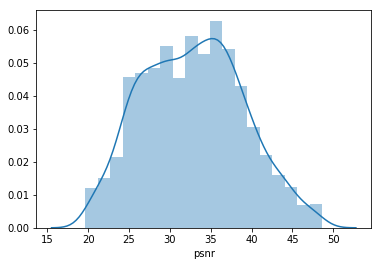

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

for column in list(y_train):
    #plt.hist(e_train[column])
    sns.distplot(y_train[column])
    plt.show()

# Normalise numerical Data

In [5]:
from sklearn.preprocessing import MinMaxScaler
from joblib import dump, load
import numpy as np

numerical_columns =['clip_duration', 'clip_size', 'clip_bitrate_total', 'encode_bitrate_video','crf','nr_of_images','nr_of_image_shifts',] 

for column in numerical_columns:
    normalizer = MinMaxScaler()
    normalizer.fit(X_train[column].values.reshape(-1,1))
    dump(normalizer, f"{column}_normalizer.pkl")
    X_train[column] = normalizer.transform(X_train[column].values.reshape(-1,1))
    X_test[column] = normalizer.transform(X_test[column].values.reshape(-1,1))

In [6]:
print(X_train.shape)
print(X_test.shape)

(1735, 177)
(434, 177)


# SVR

In [7]:
import pandas as pd
from sklearn.svm import SVR
from joblib import load, dump
from sklearn.metrics import mean_squared_error as mse

from sklearn.linear_model import LinearRegression
svr_model = SVR(kernel='linear')
svr_model.fit(X_train, y_train)
y_pred = svr_model.predict(X_test)
print(mse(y_pred, y_test))

/Users/sezin/PycharmProjects/Per-Title_encoding/venv/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


1.518377620139076


In [8]:
'''from sklearn.metrics import mean_absolute_error as mae

y_pred_test = linear_regression_model.predict(X_test)
y_scaler = load('vmaf_normalizer.pkl')
y_pred_test = y_scaler.inverse_transform(np.array(y_pred_test).reshape(-1,1))
y_test = y_scaler.inverse_transform(np.array(y_test).reshape(-1,1))

print("Linear Regression - Mean Absolute Error:", mae(y_pred=y_pred_test, y_true=y_test))
print("Linear Regression - Mean Absolute Percentage Error:", np.mean(abs(y_test-y_pred_test)/abs(y_test)),"%")'''

'from sklearn.metrics import mean_absolute_error as mae\n\ny_pred_test = linear_regression_model.predict(X_test)\ny_scaler = load(\'vmaf_normalizer.pkl\')\ny_pred_test = y_scaler.inverse_transform(np.array(y_pred_test).reshape(-1,1))\ny_test = y_scaler.inverse_transform(np.array(y_test).reshape(-1,1))\n\nprint("Linear Regression - Mean Absolute Error:", mae(y_pred=y_pred_test, y_true=y_test))\nprint("Linear Regression - Mean Absolute Percentage Error:", np.mean(abs(y_test-y_pred_test)/abs(y_test)),"%")'

In [9]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) 

Mean Absolute Error: 0.8666091630975679
Mean Squared Error: 1.518377620139076
Root Mean Squared Error: 1.2322246630136389


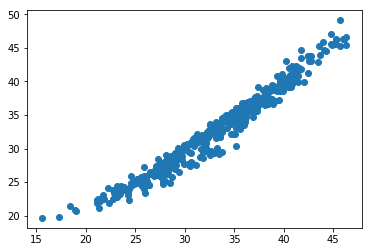

In [10]:
import matplotlib.pyplot as plt

plt.scatter(y_pred, y_test)
plt.show()

# Linear Regression

In [11]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
print(mse(y_pred_lr, y_test))

1.4224076746337844


In [12]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_lr))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_lr))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_lr))) 

Mean Absolute Error: 0.879878509039428
Mean Squared Error: 1.4224076746337844
Root Mean Squared Error: 1.1926473387526526


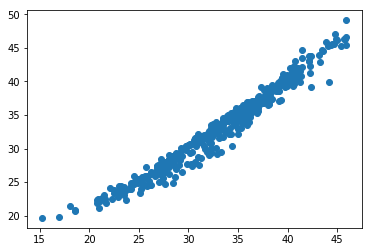

In [13]:
import matplotlib.pyplot as plt

plt.scatter(y_pred_lr, y_test)
plt.show()

# Neural Network

In [14]:
from sklearn.neural_network import MLPRegressor

nn_model = MLPRegressor(hidden_layer_sizes=(100, 250, 50))
nn_model.fit(X_train, y_train)
y_pred_nn = nn_model.predict(X_test)
print(mse(y_pred_nn, y_test))

/Users/sezin/PycharmProjects/Per-Title_encoding/venv/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:1321: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


6.950037526068214


In [15]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_nn))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_nn))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_nn))) 

Mean Absolute Error: 1.5783538857600534
Mean Squared Error: 6.950037526068214
Root Mean Squared Error: 2.6362923825077167


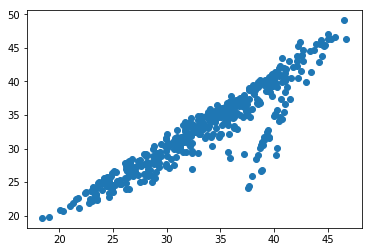

In [16]:
import matplotlib.pyplot as plt

plt.scatter(y_pred_nn, y_test)
plt.show()

# Random Forest Regressor

/Users/sezin/PycharmProjects/Per-Title_encoding/venv/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/sezin/PycharmProjects/Per-Title_encoding/venv/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


0.26082509403462634


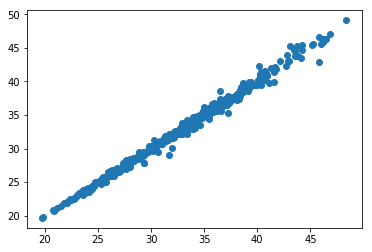

In [17]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print(mse(y_pred_rf, y_test))

import matplotlib.pyplot as plt

plt.scatter(y_pred_rf, y_test)
plt.show()

In [18]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_rf))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_rf))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_rf))) 

Mean Absolute Error: 0.3316049752112135
Mean Squared Error: 0.26082509403462634
Root Mean Squared Error: 0.5107103817572405


In [19]:
# Using Randomized Search
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats import randint as sp_randint

#param_dist = {'}

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

'''n_iter_search = 20
clfrs = RandomizedSearchCV(regressor3, 
                                   param_distributions=param_dist,
                                   scoring='neg_mean_squared_error',
                                   cv=5 , n_jobs=1, verbose=1,
                                   n_iter=n_iter_search)
clfrs.fit(df_train_x, df_train_y)
clfrs.best_params_, clfrs.best_score_'''

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


"n_iter_search = 20\nclfrs = RandomizedSearchCV(regressor3, \n                                   param_distributions=param_dist,\n                                   scoring='neg_mean_squared_error',\n                                   cv=5 , n_jobs=1, verbose=1,\n                                   n_iter=n_iter_search)\nclfrs.fit(df_train_x, df_train_y)\nclfrs.best_params_, clfrs.best_score_"

In [20]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_model = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_model.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   58.9s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  9.4min finished
/Users/sezin/PycharmProjects/Per-Title_encoding/venv/lib/python3.7/site-packages/sklearn/model_selection/_search.py:714: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=None, oob_score=False,
                                                   random_sta...


In [21]:
best=rf_model.best_estimator_
print(best)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=100,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1400,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)


In [22]:
rfbest = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=100,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=800,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)
# Fit the random search model
rfbest.fit(X_train, y_train)

/Users/sezin/PycharmProjects/Per-Title_encoding/venv/lib/python3.7/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=100,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=800,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [23]:
y_pred_rf_best = rfbest.predict(X_test)
print(mse(y_pred_rf_best, y_test))

0.1913241445868637


In [24]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_rf_best))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_rf_best))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_rf_best))) 

Mean Absolute Error: 0.29690115902836206
Mean Squared Error: 0.1913241445868637
Root Mean Squared Error: 0.43740615517715764


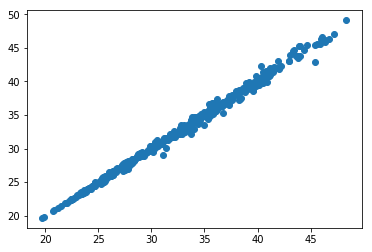

In [25]:
plt.scatter(y_pred_rf_best, y_test)
plt.show()

## Decision Tree Regressor

In [26]:
from sklearn.tree import DecisionTreeRegressor  
import random

# Best result with Hyperparameter optimisation
regressor = DecisionTreeRegressor()  

# Train the model using the training sets
regressor.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regressor.predict(X_test)

# The evaluation metrics
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) 

Mean Absolute Error: 0.45001380184331774
Mean Squared Error: 0.4440054994496403
Root Mean Squared Error: 0.6663373765966009
